In [15]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt

In [21]:
fpath = '/media/sf_VBox_Shared/Arabic/Analyses/'
counts_category = pd.read_csv(os.path.join(fpath, 'fiqh-reasoning-aggregated.csv'))

In [22]:
counts_category.head()

,BookURI,following,free,School,AuthorAKA,AuthorBORNH,AuthorBORNC,AuthorDIEDH,AuthorDIEDC,Century,Geographical_area,Number_of_tokens,century_n
0,0179MalikIbnAnas.Muwatta,2.0,11.0,مالكي,مالك,93,711,179.0,795,2ndH/8thC and 3rdH/9thC century,Fertile Crescent,151424,2
1,0264IbnYahyaMuzani.Mukhtasar,3.0,10.0,شافعي,المزني,175,791-92,264.0,877-78,2ndH/8thC and 3rdH/9thC century,Fertile Crescent,201828,2
2,0274AhmadBarqi.Mahasin,0.0,7.0,شيعي,أبو جعفر البرقي,NODATA,NODATA,274.0,887,2ndH/8thC and 3rdH/9thC century,Fertile Crescent,145940,2
3,0334IbnHusaynKhiraqi.MukhtasarMinMasailIbnHanbal,0.0,3.0,حنبلي,الخرقي,NODATA,NODATA,334.0,945/946,4th/10th century,Fertile Crescent,36539,4
4,0373AbuLaythSamarqandi.CuyunMasail,1.0,0.0,حنفي,أبو الليث السمرقندي,333,944/945,373.0,983-84,4th/10th century,Fertile Crescent,89370,4


How much more often do words related to 'free reasoning' occur, compared to 'following existing reasoning'?

In [60]:
print(counts_category.free.sum() / counts_category.following.sum())

3.37278390034


## By school
We divide the text per school, and look at what percentage of the total words refers to 'free reasoning' and 'following existing reasoning'

In [26]:
by_school = counts_category.groupby(['School']).sum()[['following', 'free', 'Number_of_tokens']]
by_school = by_school[['following', 'free']].divide(by_school.Number_of_tokens, axis=0)
by_school

,following,free
School,,
حنبلي,0.000036,0.000124
حنفي,0.000037,0.000119
شافعي,0.000076,0.000267
شيعي,0.000034,0.000109
مالكي,0.000039,0.000138


How much more often does free occur compared to following?

In [62]:
by_school.free / by_school.following

School
حنبلي    3.408284
حنفي     3.174840
شافعي    3.512668
شيعي     3.187179
مالكي    3.541237
dtype: float64

Let's plot these percentages. The higher the total bar, the more often these words appear in the text, relatively

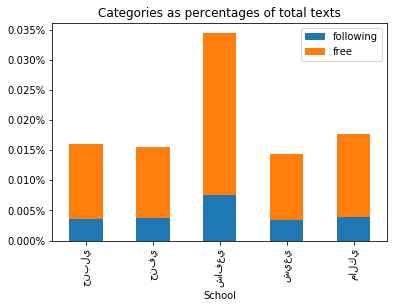

In [41]:
import matplotlib.ticker as ticker
ax = (by_school*100).plot(kind='bar', stacked=True)
plt.title('Categories as percentages of total texts')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.3f%%'))
plt.show()

The same plot, but then the bars not stacked, to more clearly see the difference in height

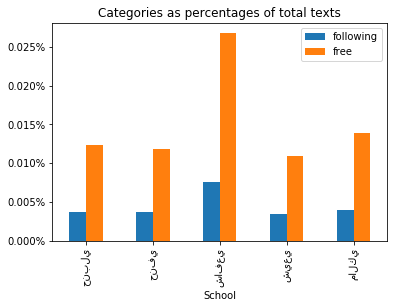

In [40]:
ax = (by_school*100).plot(kind='bar', stacked=False)
plt.title('Categories as percentages of total texts')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.3f%%'))
plt.show()

## Over centuries
We create the same counts and plots, but now for the centuries.
But first check how many books we have per century 

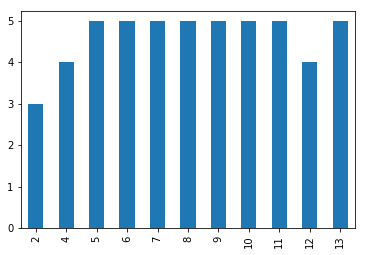

In [51]:
counts_category.century_n.value_counts(sort=False).plot(kind='bar')

In [52]:
by_century = counts_category.groupby(['century_n']).sum()[['following', 'free', 'Number_of_tokens']]
by_century = by_century[['following', 'free']].divide(by_century.Number_of_tokens, axis=0)
by_century

,following,free
century_n,,
2,0.000010,0.000056
4,0.000009,0.000103
5,0.000058,0.000218
6,0.000030,0.000113
7,0.000030,0.000106
8,0.000059,0.000136
9,0.000035,0.000129
10,0.000045,0.000149
11,0.000042,0.000174


How much more often does free occur?

In [61]:
by_century.free / by_century.following

century_n
2      5.600000
4     11.294118
5      3.730667
6      3.764706
7      3.523490
8      2.287805
9      3.674157
10     3.328205
11     4.145161
12     3.169550
13     2.921875
dtype: float64

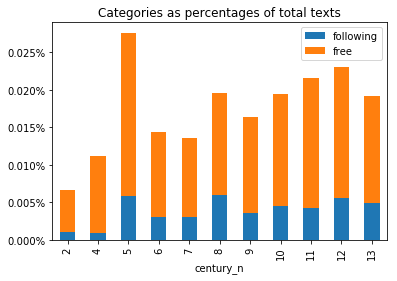

In [43]:
ax = (by_century*100).plot(kind='bar', stacked=True)
plt.title('Categories as percentages of total texts')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.3f%%'))
plt.show()

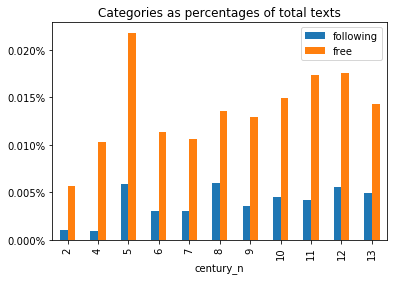

In [53]:
ax = (by_century*100).plot(kind='bar', stacked=False)
plt.title('Categories as percentages of total texts')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.3f%%'))
plt.show()

## Per region
The same plots for the regions

In [54]:
by_region = counts_category.groupby(['Geographical_area']).sum()[['following', 'free', 'Number_of_tokens']]
by_region = by_region[['following', 'free']].divide(by_region.Number_of_tokens, axis=0)
by_region

,following,free
Geographical_area,,
Anatolia and Balkans,0.000029,0.000106
Arabian Peninsula,0.000118,0.000163
Fertile Crescent,0.000048,0.000158
Greater Khorasan,0.000031,0.000129
Iran,0.000056,0.000144
Islamic West,0.000020,0.000124


In [57]:
by_region.free / by_region.following

Geographical_area
Anatolia and Balkans    3.705882
Arabian Peninsula       1.389381
Fertile Crescent        3.281541
Greater Khorasan        4.199170
Iran                    2.550847
Islamic West            6.130435
dtype: float64

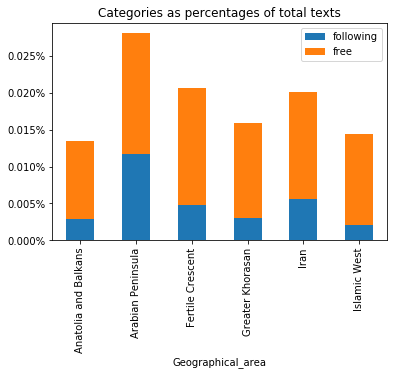

In [55]:
ax = (by_region*100).plot(kind='bar', stacked=True)
plt.title('Categories as percentages of total texts')
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.3f%%'))
plt.show()